In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model

In [2]:
# Reading the image in B&W format
img = cv2.imread("kanak.jpg", 0)

In [3]:
# Converting the image to a numpy array
im = np.asarray(img)

In [4]:
# Resizing the image to (96, 96) so that it matches the format of the models
img = cv2.resize(im, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [5]:
img.shape

(96, 96)

In [6]:
# Normalizing the image as in Original Model
img = img/255

In [7]:
X = np.empty((1, 96, 96, 1))

In [8]:
X[0] = np.expand_dims(img, axis = 2)

In [9]:
X
# Now our image matches the exact format of the 2 Models

array([[[[0.54117647],
         [0.45098039],
         [0.48235294],
         ...,
         [0.48627451],
         [0.6627451 ],
         [0.53333333]],

        [[0.51764706],
         [0.49411765],
         [0.52941176],
         ...,
         [0.51764706],
         [0.6745098 ],
         [0.68235294]],

        [[0.43529412],
         [0.49411765],
         [0.51764706],
         ...,
         [0.42745098],
         [0.4745098 ],
         [0.6       ]],

        ...,

        [[0.76470588],
         [0.74509804],
         [0.67843137],
         ...,
         [0.25882353],
         [0.2745098 ],
         [0.30196078]],

        [[0.74509804],
         [0.68627451],
         [0.81960784],
         ...,
         [0.18039216],
         [0.15294118],
         [0.23529412]],

        [[0.63529412],
         [0.8       ],
         [0.81568627],
         ...,
         [0.08627451],
         [0.33333333],
         [0.28235294]]]])

In [10]:
# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(1, 96, 96, 1)

In [11]:
with open('FacialKeyPoints-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_kp = tf.keras.models.model_from_json(json_savedModel)
model_kp.load_weights('FacialKeyPoints_weights.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_kp.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [12]:
with open('FacialExpression-model.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture 
model_e = tf.keras.models.model_from_json(json_savedModel)
model_e.load_weights('FacialExpression_weights.hdf5')
model_e.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [13]:
# Making prediction from the keypoint model
df_predict = model_kp.predict(X)

# Making prediction from the emotion model
df_emotion = np.argmax(model_e.predict(X), axis=-1)

# Reshaping array from (856,) to (856,1)
df_emotion = np.expand_dims(df_emotion, axis = 1)

# Converting the predictions into a dataframe
df_predict = pd.DataFrame(df_predict)

# Adding emotion into the predicted dataframe
df_predict['emotion'] = df_emotion

df_predict

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,emotion
0,32.685936,40.004128,66.744858,39.345627,39.795273,41.216526,25.267458,40.661774,59.57523,40.814671,...,62.320068,34.041359,75.786011,67.297966,75.410484,50.588543,76.931679,50.74192,80.191307,3


In [14]:
# Same format as the Facial Expression model
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

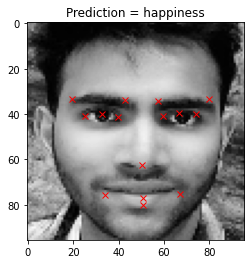

In [15]:
plt.imshow(img, cmap='gray')
plt.title('Prediction = {}'.format(label_to_text[df_predict['emotion'][0]]))
for i in range(1, 31, 2):
    plt.plot(df_predict.loc[0][i-1], df_predict.loc[0][i], 'rx')